In [9]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from heisenberg_hqa import run_heisenberg_hqa_from_datafile, datafile_to_dataframe, test_hqa
import seaborn as sns

In [2]:
model = run_heisenberg_hqa_from_datafile("data.pkl")

Training started:
-----iteration 0--model:HQA(
  (c_decoder_layer1): Linear(in_features=12, out_features=24, bias=True)
  (c_decoder_layer_out): Linear(in_features=24, out_features=12, bias=True)
  (c_layer1): Linear(in_features=12, out_features=120, bias=True)
  (c_layer2): Linear(in_features=120, out_features=75, bias=True)
  (c_out): Linear(in_features=75, out_features=25, bias=True)
)------
Loss tensor(1.9994, dtype=torch.float64, grad_fn=<AddBackward0>)
-----iteration 1--model:HQA(
  (c_decoder_layer1): Linear(in_features=12, out_features=24, bias=True)
  (c_decoder_layer_out): Linear(in_features=24, out_features=12, bias=True)
  (c_layer1): Linear(in_features=12, out_features=120, bias=True)
  (c_layer2): Linear(in_features=120, out_features=75, bias=True)
  (c_out): Linear(in_features=75, out_features=25, bias=True)
)------
Loss tensor(1.2963, dtype=torch.float64, grad_fn=<AddBackward0>)
-----iteration 2--model:HQA(
  (c_decoder_layer1): Linear(in_features=12, out_features=24, b

-----iteration 19--model:HQA(
  (c_decoder_layer1): Linear(in_features=12, out_features=24, bias=True)
  (c_decoder_layer_out): Linear(in_features=24, out_features=12, bias=True)
  (c_layer1): Linear(in_features=12, out_features=120, bias=True)
  (c_layer2): Linear(in_features=120, out_features=75, bias=True)
  (c_out): Linear(in_features=75, out_features=25, bias=True)
)------
Loss tensor(0.2458, dtype=torch.float64, grad_fn=<AddBackward0>)
-----iteration 20--model:HQA(
  (c_decoder_layer1): Linear(in_features=12, out_features=24, bias=True)
  (c_decoder_layer_out): Linear(in_features=24, out_features=12, bias=True)
  (c_layer1): Linear(in_features=12, out_features=120, bias=True)
  (c_layer2): Linear(in_features=120, out_features=75, bias=True)
  (c_out): Linear(in_features=75, out_features=25, bias=True)
)------
Loss tensor(0.1433, dtype=torch.float64, grad_fn=<AddBackward0>)
-----iteration 21--model:HQA(
  (c_decoder_layer1): Linear(in_features=12, out_features=24, bias=True)
  (c_

-----iteration 38--model:HQA(
  (c_decoder_layer1): Linear(in_features=12, out_features=24, bias=True)
  (c_decoder_layer_out): Linear(in_features=24, out_features=12, bias=True)
  (c_layer1): Linear(in_features=12, out_features=120, bias=True)
  (c_layer2): Linear(in_features=120, out_features=75, bias=True)
  (c_out): Linear(in_features=75, out_features=25, bias=True)
)------
Loss tensor(0.0664, dtype=torch.float64, grad_fn=<AddBackward0>)
-----iteration 39--model:HQA(
  (c_decoder_layer1): Linear(in_features=12, out_features=24, bias=True)
  (c_decoder_layer_out): Linear(in_features=24, out_features=12, bias=True)
  (c_layer1): Linear(in_features=12, out_features=120, bias=True)
  (c_layer2): Linear(in_features=120, out_features=75, bias=True)
  (c_out): Linear(in_features=75, out_features=25, bias=True)
)------
Loss tensor(0.2420, dtype=torch.float64, grad_fn=<AddBackward0>)


In [4]:
# Loading data
data = datafile_to_dataframe("data.pkl")
distributions = np.array(data.statevector.to_list())
characteristics = data[['depth', 'hamiltonian_indx']].values

In [12]:
# Testing the HQA
test_results = test_hqa(model, 20, distributions)

100%|██████████| 20/20 [00:01<00:00, 10.19it/s]

Average Loss: 0.06986737500497459


In [25]:
# Creating the vectors
model.create_latent_vectors(distributions, characteristics)
# model.pca_transform_latent_vectors(3, True)
model.dataframe_latent_points('heisenberg')
model.latent_landscape(5,6)

Creating ... i=0, chara=[1 0]
Creating ... i=1, chara=[2 0]
Creating ... i=2, chara=[3 0]
Creating ... i=3, chara=[4 0]
Creating ... i=4, chara=[1 1]
Creating ... i=5, chara=[2 1]
Creating ... i=6, chara=[3 1]
Creating ... i=7, chara=[4 1]


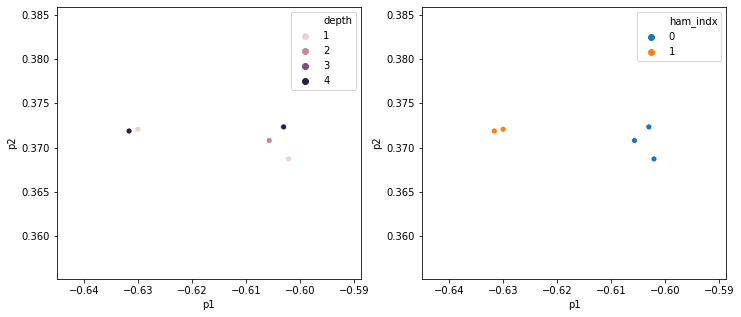

In [26]:
fig, axs = plt.subplots(1,2, figsize=(12,5))
ax = sns.scatterplot(x="p1", y="p2", hue='depth', data=model.df_latent_vectors, ax=axs[0])
ax = sns.scatterplot(x="p1", y="p2", hue='ham_indx', data=model.df_latent_vectors, ax=axs[1])

In [28]:
model.df_latent_vectors

,depth,ham_indx,latent_vector,p1,p2
0,1,0,"[0.75140464, 0.2200312, 0.07900041, 0.19230554...",-0.602086,0.368719
1,2,0,"[0.7550371, 0.2180929, 0.081800275, 0.19056703...",-0.605708,0.370795
2,3,0,"[0.7658887, 0.21519817, 0.07516377, 0.18180412...",-0.603039,0.372333
3,4,0,"[0.7658891, 0.21519797, 0.07516366, 0.18180424...",-0.603040,0.372333
4,1,1,"[0.76929545, 0.21263947, 0.08492842, 0.1969406...",-0.630058,0.372063
5,2,1,"[0.7688487, 0.21219191, 0.08592346, 0.19812849...",-0.631700,0.371870
6,3,1,"[0.7688486, 0.2121919, 0.085923515, 0.19812857...",-0.631700,0.371870
7,4,1,"[0.7688486, 0.21219192, 0.085923485, 0.1981284...",-0.631700,0.371870
